In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random

from datetime import datetime

%matplotlib inline

In [2]:
categories = {
    'watch': ['WatchEvent'],
    'interact': ['CommitCommentEvent', 'GollumEvent', 'PullRequestReviewCommentEvent','IssuesEvent', 
                 'IssueCommentEvent'],
    'contribute': ['CreateEvent', 'DeleteEvent', 'PullRequestEvent', 'PushEvent','ReleaseEvent', 'MemberEvent'],
    'fork': ['ForkEvent']
}

In [3]:
path = 'aggregated/'

In [4]:
ecounts = pd.DataFrame()
ccounts = pd.DataFrame()
for m in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
    c = pd.read_csv(path + 'category_counts_{}.csv'.format(m)).set_index('index')
    c.columns = [m]
    e = pd.read_csv(path + 'event_counts_{}.csv'.format(m)).set_index('index')
    e.columns = [m]
    
    ecounts = pd.concat([ecounts, e], axis=1)
    ccounts = pd.concat([ccounts, c], axis=1)

/home/brambilla/anaconda3/envs/oss-p/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


## Global Activities: Statistics

In [5]:
ccounts

,01,02,03,04,05,06,07,08,09,10,11,12
index,,,,,,,,,,,,
contribute,30407486,28954264,34451135,32120702,30510662,29494727,29384947,29344064,29021043,33530105,32380189,29817985
interact,5186785,4942687,5538847,4745861,4855461,4925848,4796473,4910047,4608717,5511791,5045478,4344162
watch,3517021,2912750,3525371,3056792,3155441,2935951,2943877,3037336,2884811,3011657,3065009,3022137
fork,1164057,1003580,1205978,1038661,1046172,1009717,1023290,1039988,1013645,1219730,1067564,988271


In [6]:
ecounts

,01,02,03,04,05,06,07,08,09,10,11,12
CommitCommentEvent,76063,72203,79809,66870,66670,65565,62532,64007,61949,72471,70332,61764
CreateEvent,5612456,5275744,6273874,5500806,5317823,5185701,5197030,5232688,5649681,6250090,5931632,5347316
DeleteEvent,1129083,1099671,1318095,1134125,933738,903100,907281,913672,877547,1042738,1005240,929440
ForkEvent,1164057,1003580,1205978,1038661,1046172,1009717,1023290,1039988,1013645,1219730,1067564,988271
GollumEvent,255991,219794,256120,217071,215374,199887,186507,193920,196585,219176,195017,175444
IssueCommentEvent,2745310,2621687,2922592,2468078,2518084,2601032,2476127,2563415,2421796,2905965,2611004,2251616
IssuesEvent,1417404,1350027,1508635,1332173,1376368,1336868,1341974,1356146,1263213,1489370,1383351,1221185
MemberEvent,186262,196130,245751,186040,169390,148031,139014,146362,180247,224696,209222,143184
PublicEvent,42440,39580,45162,40698,48929,41906,37002,34692,38044,45361,40994,38995
PullRequestEvent,2145948,2078329,2430823,2118166,2188562,2202593,2194858,2289634,2177922,2975249,2566928,2228608


#### Global Contribute Activities

In [7]:
N_activities = ccounts.apply(lambda x: x.sum(), axis=1).sum()
ccounts.apply(lambda x: x.sum()/N_activities, axis=1)

index
contribute    0.771680
interact      0.124107
watch         0.077432
fork          0.026781
dtype: float64

In [8]:
ecounts.apply(lambda x: x.sum()/N_activities, axis=1).sort_values(ascending=False)

PushEvent                        0.540606
CreateEvent                      0.139487
WatchEvent                       0.077432
IssueCommentEvent                0.064979
PullRequestEvent                 0.057649
IssuesEvent                      0.034210
ForkEvent                        0.026781
DeleteEvent                      0.025472
PullRequestReviewCommentEvent    0.017918
GollumEvent                      0.005287
MemberEvent                      0.004542
ReleaseEvent                     0.003924
CommitCommentEvent               0.001713
PublicEvent                      0.001032
dtype: float64

### Timeseries

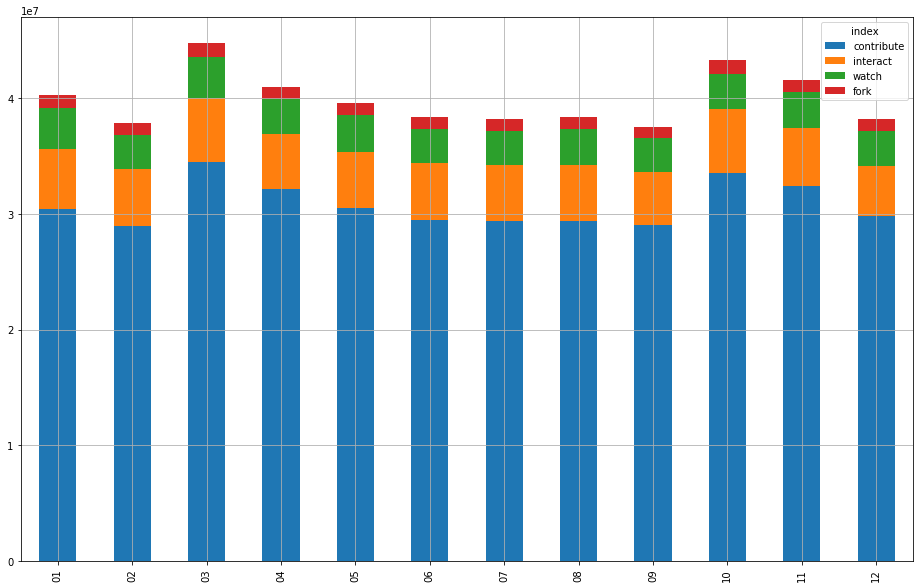

In [9]:
plt.figure(figsize=(16, 10))
ccounts.T.plot.bar(ax=plt.gca(), stacked=True)
plt.grid()

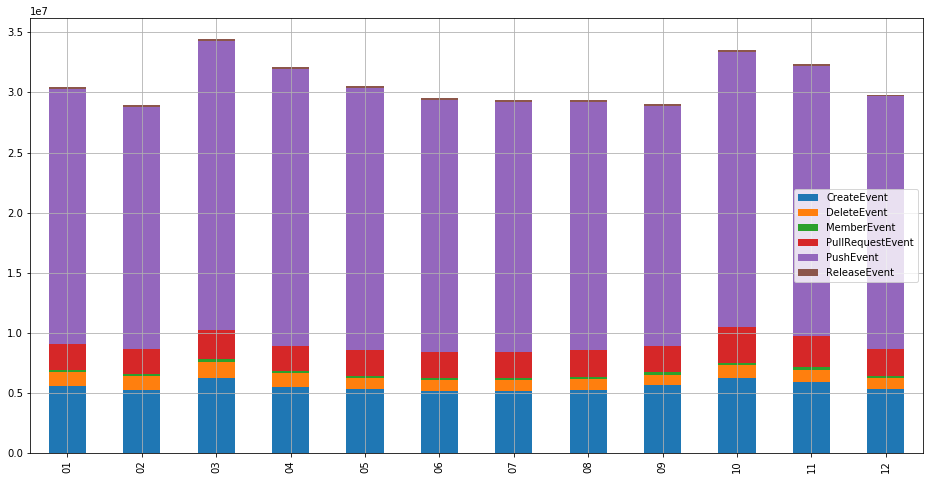

In [10]:
ecounts[ecounts.index.isin(categories['contribute'])].T.plot.bar(stacked=True, figsize=(16, 8))
plt.grid()

## Random Users Sample: Statistics

In [2]:
usample = pd.read_csv('sample_u_activity.csv')
usample.head()

,user,category,#events
0,1599,contribute,47
1,1599,interact,16
2,1599,watch,3
3,2903,contribute,2
4,3251,contribute,3


In [3]:
usample_cat = usample.groupby(by=['user', 'category'])[['#events']].sum().reset_index()
usample_cat.head()

,user,category,#events
0,1599,contribute,341
1,1599,fork,9
2,1599,interact,255
3,1599,watch,37
4,2903,contribute,197


In [4]:
usample_cat.shape

(22526, 3)

In [5]:
u_distr = usample_cat.pivot(index='user', columns='category', values='#events').fillna(0)
u_distr.head()

category,contribute,fork,interact,watch
user,,,,
1599,341.0,9.0,255.0,37.0
2903,197.0,1.0,7.0,0.0
3251,44.0,2.0,12.0,0.0
3758,8.0,0.0,23.0,0.0
4028,5.0,1.0,0.0,1.0


In [6]:
u_distr.shape

(9989, 4)

In [7]:
norm_u_distr = u_distr.div(u_distr.sum(axis=1), axis=0)
norm_u_distr.head()

category,contribute,fork,interact,watch
user,,,,
1599,0.531153,0.014019,0.397196,0.057632
2903,0.960976,0.004878,0.034146,0.000000
3251,0.758621,0.034483,0.206897,0.000000
3758,0.258065,0.000000,0.741935,0.000000
4028,0.714286,0.142857,0.000000,0.142857


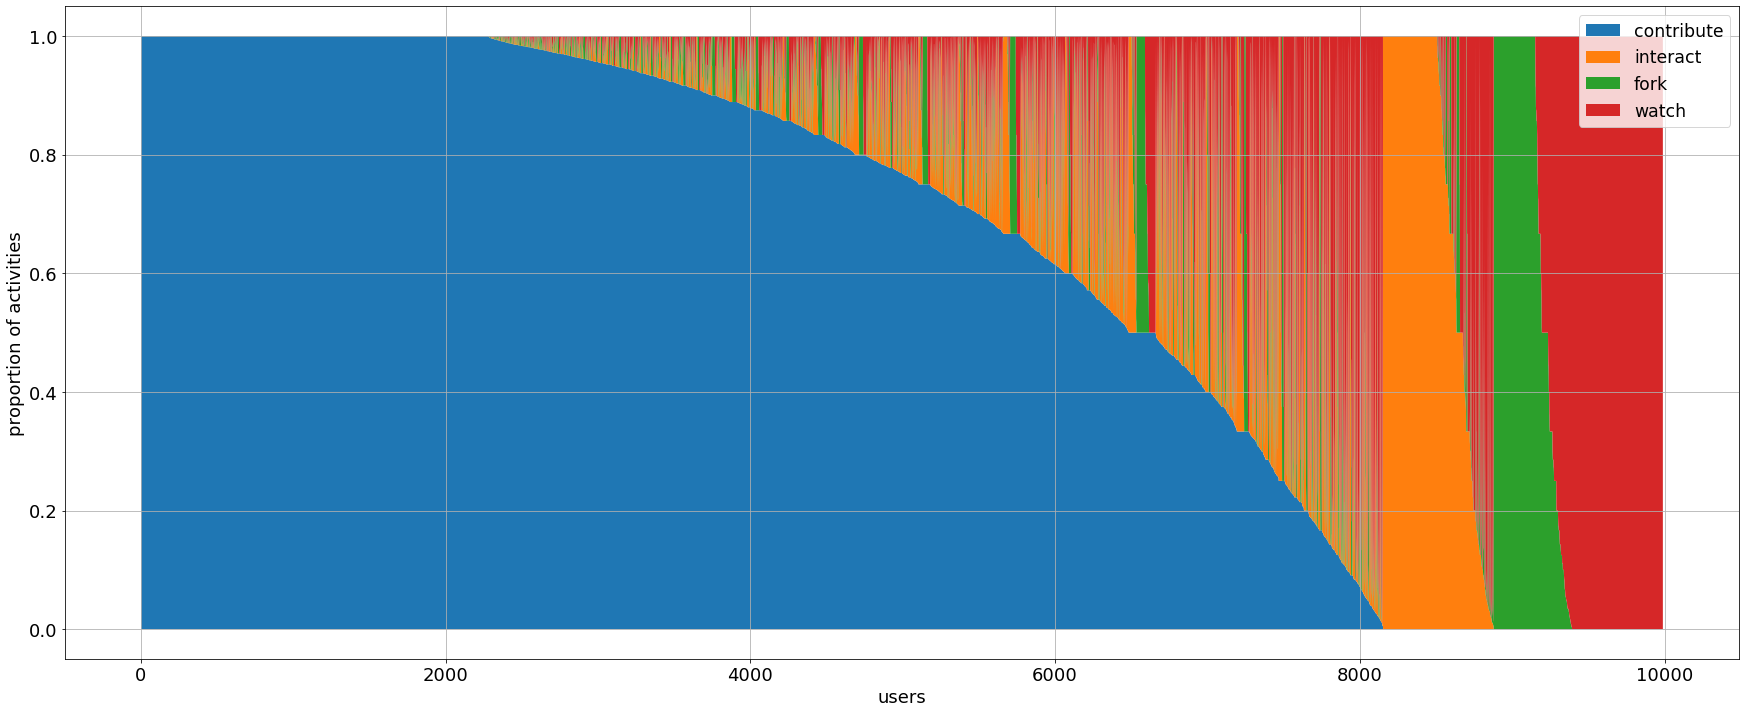

In [17]:
font = 18

plt.figure(figsize=(30, 12))

N = norm_u_distr.shape[0]
x = range(N)
y = norm_u_distr.sample(N).sort_values(by=['contribute', 'interact','fork'], ascending=False)

plt.fill_between(x, 0, y["contribute"], label='contribute')
plt.fill_between(x, y["contribute"], y["interact"]+y["contribute"], label='interact')
plt.fill_between(x, y["contribute"]+y["interact"], y["interact"]+y["contribute"]+y["fork"], label='fork')
plt.fill_between(x, y["interact"] + y['contribute']+y["fork"], y["watch"]+y["interact"]+y['contribute']+y["fork"], 
                                                                                         label='watch')
plt.grid()
plt.legend(fontsize='xx-large')
plt.xlabel('users', fontsize=font)
plt.ylabel('proportion of activities', fontsize=font)
plt.xticks(fontsize=font);
plt.yticks(fontsize=font);

In [18]:
N_contrib = norm_u_distr[norm_u_distr['contribute'] > 0].shape[0]
print(N_contrib, float(N_contrib)/N)

8152 0.8160977074782261


In [19]:
N_interact = norm_u_distr[(norm_u_distr['contribute'] == 0) & (norm_u_distr['interact'] > 0)].shape[0]
print(N_interact, float(N_interact)/N)

726 0.07267994794273701


In [20]:
N_fork = norm_u_distr[(norm_u_distr['contribute'] == 0) & 
                      (norm_u_distr['interact'] == 0) & 
                      (norm_u_distr['fork'] > 0)].shape[0]
print(N_fork, float(N_fork)/N)

514 0.051456602262488736


In [21]:
N_fork_only = norm_u_distr[(norm_u_distr['contribute'] == 0) & 
                      (norm_u_distr['interact'] == 0) & 
                      (norm_u_distr['fork'] > 0) &
                      (norm_u_distr['watch'] == 0)].shape[0]
print(N_fork_only, float(N_fork_only)/N)

273 0.027330063069376315


In [22]:
N_watch = norm_u_distr[(norm_u_distr['contribute'] == 0) & 
                      (norm_u_distr['interact'] == 0) & 
                      (norm_u_distr['fork'] == 0) &
                      (norm_u_distr['watch'] > 0)].shape[0]
print(N_watch, float(N_watch)/N)

597 0.0597657423165482


In [23]:
N_w_f = norm_u_distr[(norm_u_distr['contribute'] == 0) & 
                      (norm_u_distr['interact'] == 0) & 
                      (norm_u_distr['fork'] > 0) &
                      (norm_u_distr['watch'] > 0)].shape[0]
print(N_w_f, float(N_w_f)/N) 

241 0.024126539193112424


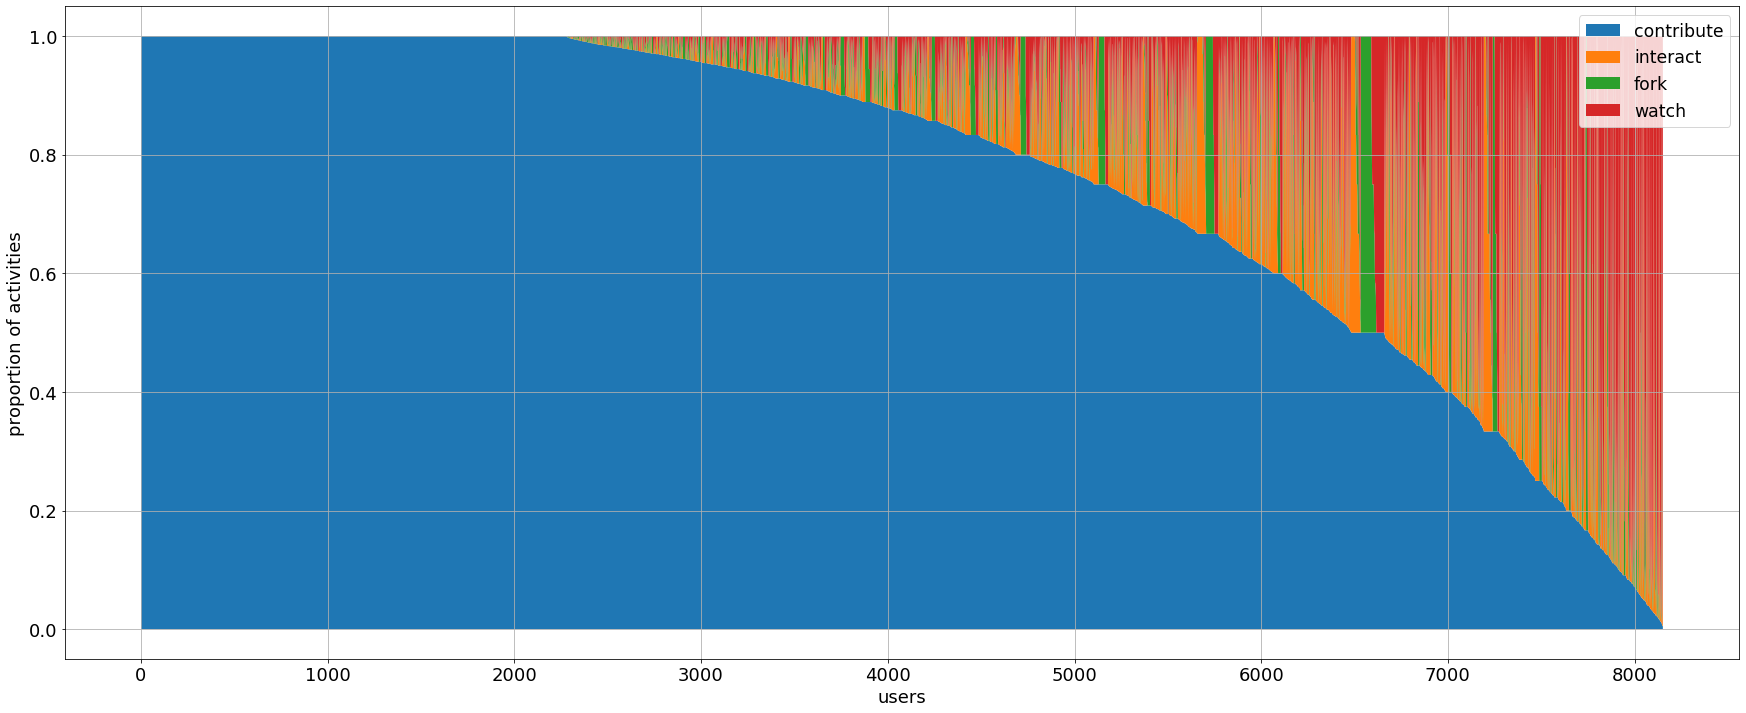

In [24]:
font = 18

plt.figure(figsize=(30, 12))


y = norm_u_distr[norm_u_distr['contribute']>0].sort_values(by=['contribute','interact','fork'], ascending=False)
x = range(y.shape[0])

plt.fill_between(x, 0, y["contribute"], label='contribute')
plt.fill_between(x, y["contribute"], y["interact"]+y["contribute"], label='interact')
plt.fill_between(x, y["contribute"]+y["interact"], y["interact"]+y["contribute"]+y["fork"], label='fork')
plt.fill_between(x, y["interact"] + y['contribute']+y["fork"], y["watch"]+y["interact"]+y['contribute']+y["fork"], 
                                                                                         label='watch')
plt.grid()
plt.legend(fontsize='xx-large')
plt.xlabel('users', fontsize=font)
plt.ylabel('proportion of activities', fontsize=font)
plt.xticks(fontsize=font);
plt.yticks(fontsize=font);

### Zypf's Law

In [12]:
# https://gist.github.com/diogojc/1394300
def powerLaw(y, x):
    """
    'When the frequency of an event varies as power of some attribute of that
    event the frequency is said to follow a power law.' (wikipedia)
    This is represented by the following equation, where c and alpha are
    constants:
    y = c . x ^ alpha
    Args
    --------
    y: array with frequency of events >0
    x: numpy array with attribute of events >0
    Output
    --------
    (c, alpha)
    c: the maximum frequency of any event
    alpha: defined by (Newman, 2005 for details):
        alpha = 1 + n * sum(ln( xi / xmin )) ^ -1
    """
    c = 0
    alpha = .0

    if len(y) and len(y)==len(x):
        c = max(y)
        xmin = float(min(x))
        alpha = 1 + len(x) * pow(sum(np.log(x/xmin)),-1)

    return (c, alpha)

In [8]:
sample_rank = u_distr.apply(lambda x: x.sum(), axis=1).sort_values(ascending=False).reset_index(drop=True)

In [9]:
contribute_rank = u_distr.contribute.sort_values(ascending=False).reset_index(drop=True)
interact_rank = u_distr.interact.sort_values(ascending=False).reset_index(drop=True)
watch_rank = u_distr.watch.sort_values(ascending=False).reset_index(drop=True)
fork_rank = u_distr.fork.sort_values(ascending=False).reset_index(drop=True)

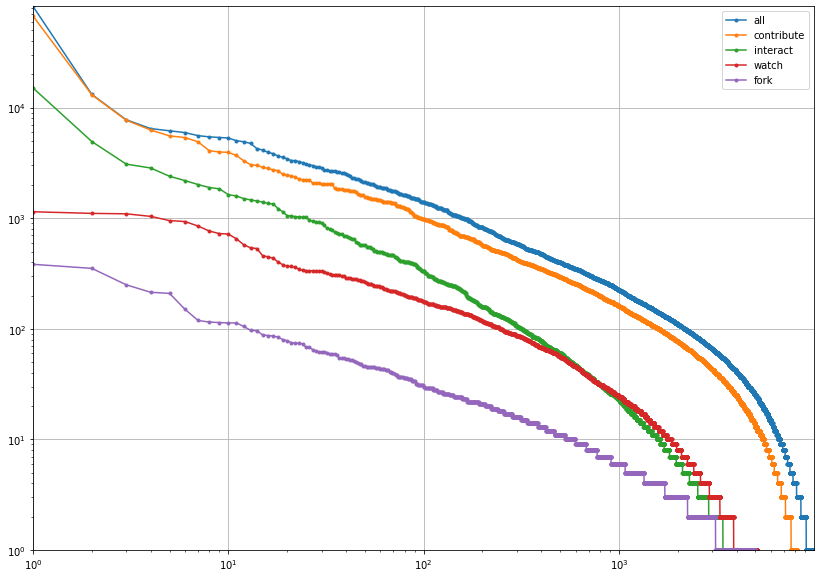

In [29]:
plt.figure(figsize=(14, 10))
x_axis = range(1, len(sample_rank)+1)
plt.loglog(x_axis, sample_rank.values, marker=".", label='all')

plt.loglog(x_axis, contribute_rank.values, marker=".", label='contribute')
plt.loglog(x_axis, interact_rank.values, marker=".", label='interact')
plt.loglog(x_axis, watch_rank.values, marker=".", label='watch')
plt.loglog(x_axis, fork_rank.values, marker=".", label='fork')

#plt.plot([1, len(sample_rank)],[sample_rank.values[0] ,1], color='black', linestyle='--')
plt.xlim([1, len(sample_rank.values)+10])
plt.ylim([1, max(sample_rank.values)+10])
plt.grid()
plt.legend()

In [28]:
u_distr[u_distr['watch'] >= 500]

category,contribute,fork,interact,watch
user,,,,
53277,118.0,1.0,1.0,651.0
157338,167.0,17.0,39.0,849.0
160527,0.0,0.0,0.0,726.0
590222,32.0,4.0,7.0,765.0
3179872,318.0,19.0,29.0,952.0
3696327,53.0,7.0,26.0,575.0
3822219,185.0,8.0,64.0,1106.0
9203548,175.0,35.0,64.0,933.0
9441295,252.0,12.0,28.0,540.0


In [23]:
from sklearn import preprocessing

ModuleNotFoundError: No module named 'sklearn'

In [13]:
powerLaw(sample_rank.values, np.array(x_axis))

(82268.0, 1.12180575475028)

In [18]:
powerlaw = pow(np.array(x_axis), -1.12180575475028)

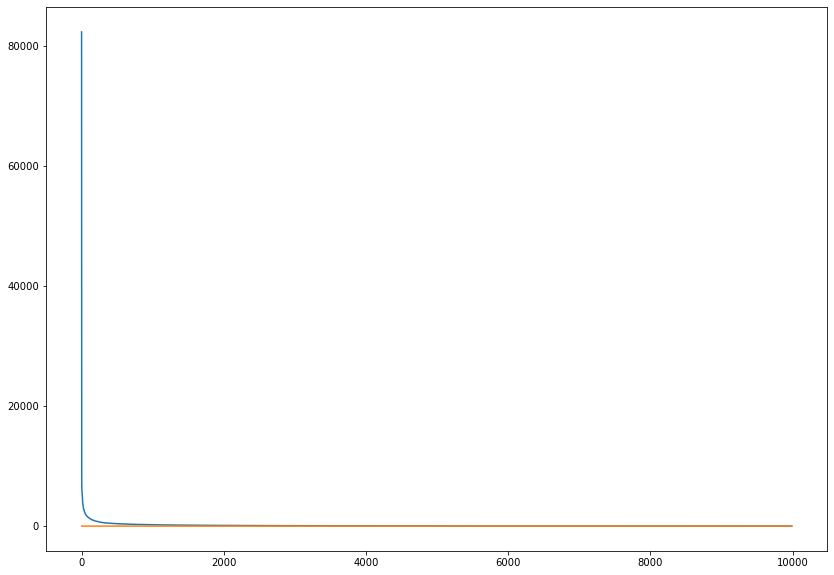

In [22]:
plt.figure(figsize=(14, 10))
plt.plot(sample_rank.values)
plt.plot(powerlaw, color='k', linestyle='--')

In [20]:
powerlaw

array([1.00000000e+00, 4.59518307e-01, 2.91583289e-01, ...,
       3.26145015e-05, 3.26108384e-05, 3.26071761e-05])